<a href="https://colab.research.google.com/github/dinithprimal/TensorFlow_HandsOn/blob/main/Ex02_Tensorflow_2x.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

# Load Dataset

In [ ]:
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')  # Training Data
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')  # Testing Data

# Removing survived column form the dataset and assign to y_train and y_eval
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

In [ ]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [ ]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [ ]:
dftrain.shape

(627, 9)

In [ ]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

<Axes: >

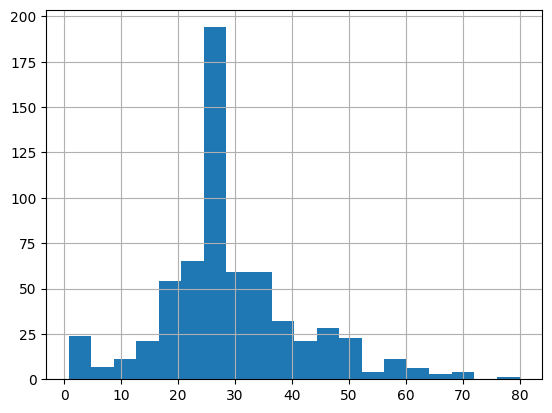

In [ ]:
dftrain.age.hist(bins=20)

<Axes: >

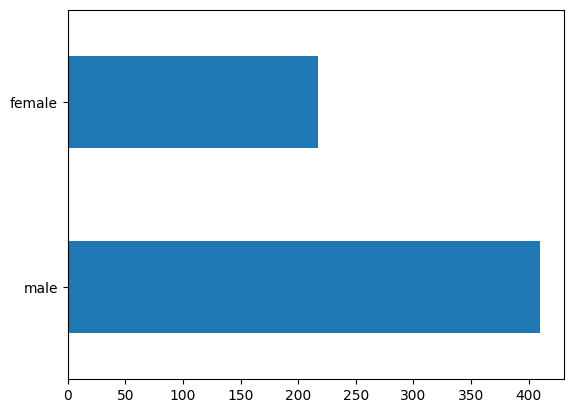

In [ ]:
dftrain.sex.value_counts().plot(kind='barh')

<Axes: >

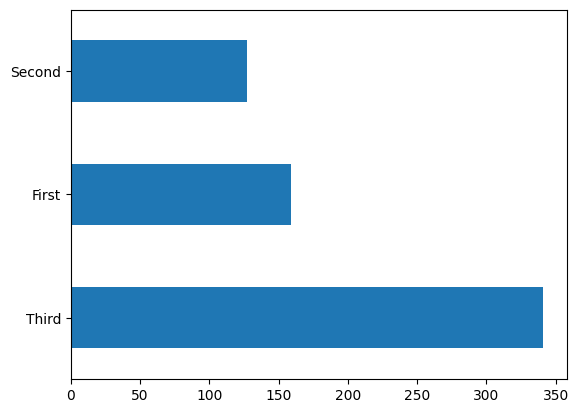

In [ ]:
dftrain['class'].value_counts().plot(kind='barh')

Text(0.5, 0, '% survived')

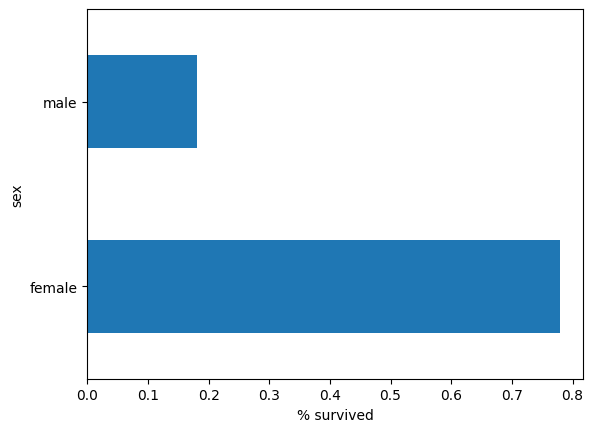

In [ ]:
pd.concat([dftrain, y_train], axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survived')

# Training and Testing Data

In [ ]:
dfeval.shape

(264, 9)

In [ ]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                      'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique()
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.
Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

## Input Funciton

In [ ]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
    if shuffle:
      ds = ds.shuffle(1000)
    ds = ds.batch(batch_size).repeat(num_epochs)
    return ds
  return input_function

train_input_fn = make_input_fn(dftrain, y_train)
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

## Creating the Model

In [ ]:
linear_est = tf.estimator.LinearClassifier(feature_columns = feature_columns)

Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.


## Training the Model

In [ ]:
linear_est.train(train_input_fn)
result = linear_est.evaluate(eval_input_fn)

# clear_output()
print(result['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.


0.75757575


In [ ]:
print(result)

{'accuracy': 0.75757575, 'accuracy_baseline': 0.625, 'auc': 0.8374044, 'auc_precision_recall': 0.78934145, 'average_loss': 0.4705605, 'label/mean': 0.375, 'loss': 0.4624806, 'precision': 0.68041235, 'prediction/mean': 0.37041798, 'recall': 0.6666667, 'global_step': 200}


In [ ]:
result = list(linear_est.predict(eval_input_fn))
print(result)

Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.


[{'logits': array([-2.5665157], dtype=float32), 'logistic': array([0.07132475], dtype=float32), 'probabilities': array([0.92867523, 0.07132475], dtype=float32), 'class_ids': array([0]), 'classes': array([b'0'], dtype=object), 'all_class_ids': array([0, 1], dtype=int32), 'all_classes': array([b'0', b'1'], dtype=object)}, {'logits': array([-0.72860575], dtype=float32), 'logistic': array([0.32550076], dtype=float32), 'probabilities': array([0.6744993, 0.3255008], dtype=float32), 'class_ids': array([0]), 'classes': array([b'0'], dtype=object), 'all_class_ids': array([0, 1], dtype=int32), 'all_classes': array([b'0', b'1'], dtype=object)}, {'logits': array([0.7471321], dtype=float32), 'logistic': array([0.6785535], dtype=float32), 'probabilities': array([0.32144654, 0.6785535 ], dtype=float32), 'class_ids': array([1]), 'classes': array([b'1'], dtype=object), 'all_class_ids': array([0, 1], dtype=int32), 'all_classes': array([b'0', b'1'], dtype=object)}, {'logits': array([0.37019426], dtype=fl

In [ ]:
print(result[0])

{'logits': array([-2.5665157], dtype=float32), 'logistic': array([0.07132475], dtype=float32), 'probabilities': array([0.92867523, 0.07132475], dtype=float32), 'class_ids': array([0]), 'classes': array([b'0'], dtype=object), 'all_class_ids': array([0, 1], dtype=int32), 'all_classes': array([b'0', b'1'], dtype=object)}


In [ ]:
print(result[0]['probabilities'])

[0.92867523 0.07132475]


In [ ]:
print(dfeval.loc[0])
print(y_eval.loc[0])
print(result[0]['probabilities'][1])

sex                          male
age                          35.0
n_siblings_spouses              0
parch                           0
fare                         8.05
class                       Third
deck                      unknown
embark_town           Southampton
alone                           y
Name: 0, dtype: object
0
0.07132475


In [ ]:
print(dfeval.loc[10])
print(y_eval.loc[10])
print(result[10]['probabilities'][1])

sex                       female
age                         28.0
n_siblings_spouses             0
parch                          0
fare                        7.75
class                      Third
deck                     unknown
embark_town           Queenstown
alone                          y
Name: 10, dtype: object
1
0.63192725


In [ ]:
print(dfeval.loc[20])
print(y_eval.loc[20])
print(result[20]['probabilities'][1])

sex                          male
age                          20.0
n_siblings_spouses              0
parch                           0
fare                       7.8542
class                       Third
deck                      unknown
embark_town           Southampton
alone                           y
Name: 20, dtype: object
0
0.10499536


In [ ]:
print(dfeval.loc[30])
print(y_eval.loc[30])
print(result[30]['probabilities'][1])

sex                        male
age                        33.0
n_siblings_spouses            0
parch                         0
fare                     7.8958
class                     Third
deck                    unknown
embark_town           Cherbourg
alone                         y
Name: 30, dtype: object
0
0.12455724


In [ ]:
print(dfeval.loc[40])
print(y_eval.loc[40])
print(result[40]['probabilities'][1])

sex                        female
age                          40.0
n_siblings_spouses              0
parch                           0
fare                        15.75
class                      Second
deck                      unknown
embark_town           Southampton
alone                           y
Name: 40, dtype: object
1
0.6885595


In [ ]:
print(dfeval.loc[50])
print(y_eval.loc[50])
print(result[50]['probabilities'][1])

sex                         male
age                         40.0
n_siblings_spouses             1
parch                          1
fare                        15.5
class                      Third
deck                     unknown
embark_town           Queenstown
alone                          n
Name: 50, dtype: object
0
0.08913931


In [ ]:
print(dfeval.loc[60])
print(y_eval.loc[60])
print(result[60]['probabilities'][1])

sex                          male
age                          38.0
n_siblings_spouses              1
parch                           0
fare                         90.0
class                       First
deck                            C
embark_town           Southampton
alone                           n
Name: 60, dtype: object
1
0.29490432
